# Q.1 ) Prepare a prediction model for predicting Price.
## Consider only the below columns

## ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

Model -- model of the car

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

In [87]:
import pandas as pd
import numpy as np

In [88]:
corolla=pd.read_csv('ToyotaCorolla.csv', encoding='cp1252')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [89]:
#shape of the data
corolla.shape

(1436, 38)

In [90]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [91]:
#consider only these 

data=corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


## All data are in numeric type.

In [93]:
data.shape

(1436, 9)

In [94]:
#null values
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

## there is no null value present in data.

In [95]:
data.duplicated().sum()

1

In [96]:
#show the duplicates
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [97]:
#remove duplicates
data.drop_duplicates(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3620\1511750288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [98]:
#reseeting the index
data.reset_index(drop=True,inplace=True)

In [99]:
data.duplicated().sum()

0

In [100]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [101]:
#correlation coefficient
corrl=data.corr()
corrl

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

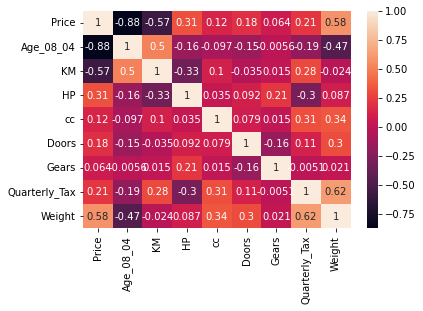

In [102]:
#Heatmap
import seaborn as sns
sns.heatmap(corrl, annot=True)

### By observing the heatmap,we can say that there is no multicollinearity between input variables. Hence,assumption of no multicollinearity satisfied.

# Data Visualization

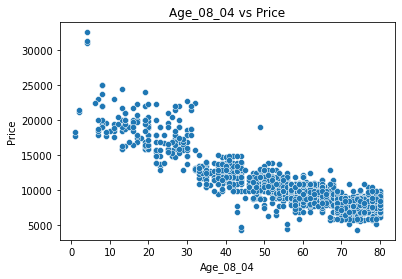

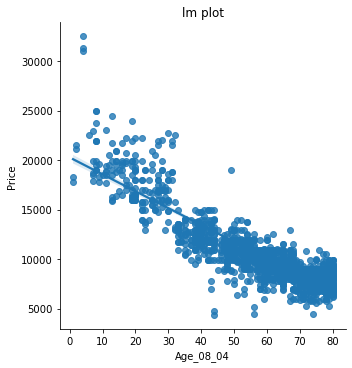

In [103]:
#Scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x='Age_08_04',y='Price',data=data)
plt.title('Age_08_04 vs Price')

#lm plot for linearity
sns.lmplot(x='Age_08_04',y='Price',data=data)
plt.title('lm plot')
plt.show()

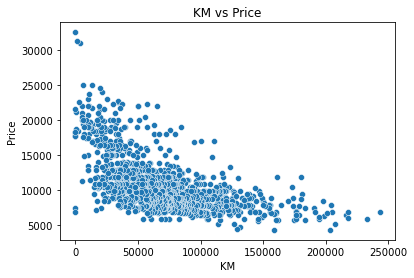

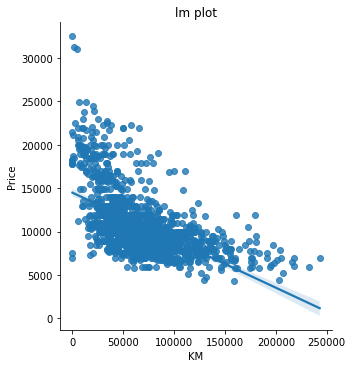

In [104]:
#Scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x='KM',y='Price',data=data)
plt.title('KM vs Price')

#lm plot for linearity
sns.lmplot(x='KM',y='Price',data=data)
plt.title('lm plot')
plt.show()

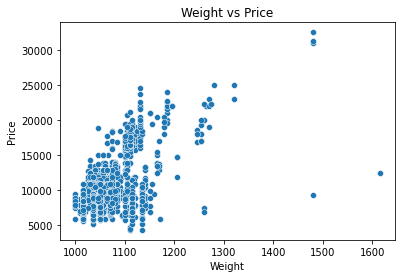

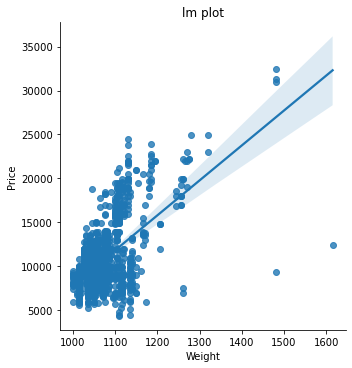

In [105]:
#Scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x='Weight',y='Price',data=data)
plt.title('Weight vs Price')

#lm plot for linearity
sns.lmplot(x='Weight',y='Price',data=data)
plt.title('lm plot')
plt.show()

# Data Prepration 

In [106]:
#split data predictors(y) and regressors(x) 
x=data.drop('Price',axis=1)
y=data[['Price']]

In [107]:
x, y

(      Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
 0            23  46986   90  2000      3      5            210    1165
 1            23  72937   90  2000      3      5            210    1165
 2            24  41711   90  2000      3      5            210    1165
 3            26  48000   90  2000      3      5            210    1165
 4            30  38500   90  2000      3      5            210    1170
 ...         ...    ...  ...   ...    ...    ...            ...     ...
 1430         69  20544   86  1300      3      5             69    1025
 1431         72  19000   86  1300      3      5             69    1015
 1432         71  17016   86  1300      3      5             69    1015
 1433         70  16916   86  1300      3      5             69    1015
 1434         76      1  110  1600      5      5             19    1114
 
 [1435 rows x 8 columns],
       Price
 0     13500
 1     13750
 2     13950
 3     14950
 4     13750
 ...     ...
 1430   7500
 143

# MOdel Building
## StandardScaler Transformation
### we scale features that bring every feature in the same range, and the model uses every feature wisely.

In [108]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(x)
X_scaled = pd.DataFrame(data=X_scaled,columns = x.columns)
X_scaled

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...
1430,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


# Model Training using linear regression


In [109]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_scaled,y)

LinearRegression()

In [110]:
#coefficients
linear_model.coef_

array([[-2.25862554e+03, -7.77200045e+02,  4.73017054e+02,
        -5.02968400e+01, -8.76327907e-01,  1.12674914e+02,
         1.57999990e+02,  8.80423097e+02]])

In [111]:
#intercept
linear_model.intercept_

array([10720.91567944])

In [112]:
#predicted values
y_pred = linear_model.predict(X_scaled)
y_pred

array([[16791.95887083],
       [16253.80041357],
       [16779.63521013],
       ...,
       [ 8455.43440191],
       [ 8579.22204117],
       [10396.0875261 ]])

In [113]:
#residuals  error=actual value - predicted value
error = y - y_pred
error

,Price
0,-3291.958871
1,-2503.800414
2,-2829.635210
3,-1455.789389
4,-2450.217277
...,...
1430,-1294.255037
1431,2552.422658
1432,44.565598
1433,-1329.222041


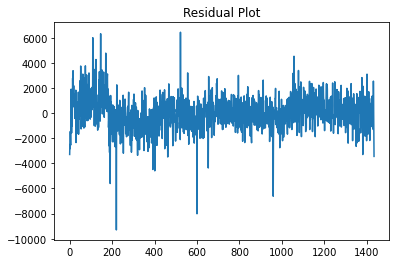

In [114]:
plt.plot(error)
plt.title('Residual Plot')
plt.show()

# Model Building || Model Training Using OLS method 

In [115]:
#model fitting by using raw data
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model

In [116]:
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:46:54   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## After observing model's summary we find that 'CC' and "Doors' are insignificant to predict the 'Price' of a car. bcoz there p-value is greater than significance level (0.05), so we have to accept the null hypothesis i.e.  there is no linear relationship between 'Price' and 'CC' and 'Price' and 'Doors'

### Build model individually using SLR

In [118]:
model_cc = smf.ols('Price~cc',data=data).fit()
model_cc

In [119]:
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.29e-06
Time:                        11:46:54   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
model_Doors = smf.ols('Price~Doors',data=data).fit()
model_Doors

In [121]:
model_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.40e-12
Time:                        11:46:54   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# taking both 'cc' and 'Doors' together
model_1 = smf.ols('Price~cc+Doors',data=data).fit()
model_1

In [123]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.55e-15
Time:                        11:46:55   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF for the test of Multicollinearity

In [124]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM ~ Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP ~ Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc ~ Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors ~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears ~ Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax ~ Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data).fit().rsquared
vif_Weight=1/(1-rsq_Weight)


In [125]:
#create dataframe from VIF factor of all columns
VIF=pd.DataFrame(data={'vif_age':[vif_age],'vif_km':[vif_km],'vif_hp':[vif_hp],
                        'vif_cc':[vif_cc],'vif_Doors':[vif_Doors],'vif_Gears':[vif_Gears],
                        'vif_Quarterly_Tax':[vif_Quarterly_Tax],'vif_Weight':[vif_Weight]
                    }).T #transpose of data frame using .T
VIF

,0
vif_age,1.876236
vif_km,1.757178
vif_hp,1.419180
vif_cc,1.163470
vif_Doors,1.155890
vif_Gears,1.098843
vif_Quarterly_Tax,2.295375
vif_Weight,2.487180


## By observing VIF of each input variable,the values are less that 5,hence we can say that there is no Multicollinearity.

# Residual Analysis
## Test for normality of residuals(errors = actual - predicted)

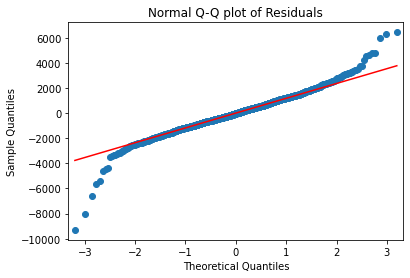

In [126]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

####  Maximum points are close to straight line, hence Normality Condition satisfied

# Residual Plot For Homoscedasticity
#### A scatterplot of residuals versus predicted values is good way to check for homoscedasticity.  There should be no clear pattern in the distribution; if there is a cone-shaped pattern (as shown below), the data is heteroscedastic.

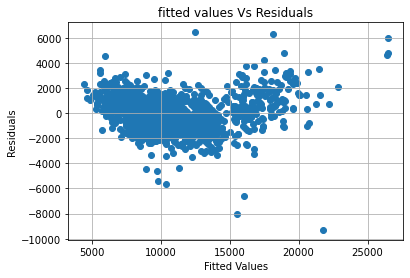

In [127]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('fitted values Vs Residuals')
plt.grid(True)
plt.show()

### here by above plot we can say that the datapoints are close towards zero,hence the assumption for Homoscedasticity satisfied. 

# Residual Vs Regressors

eval_env: 1


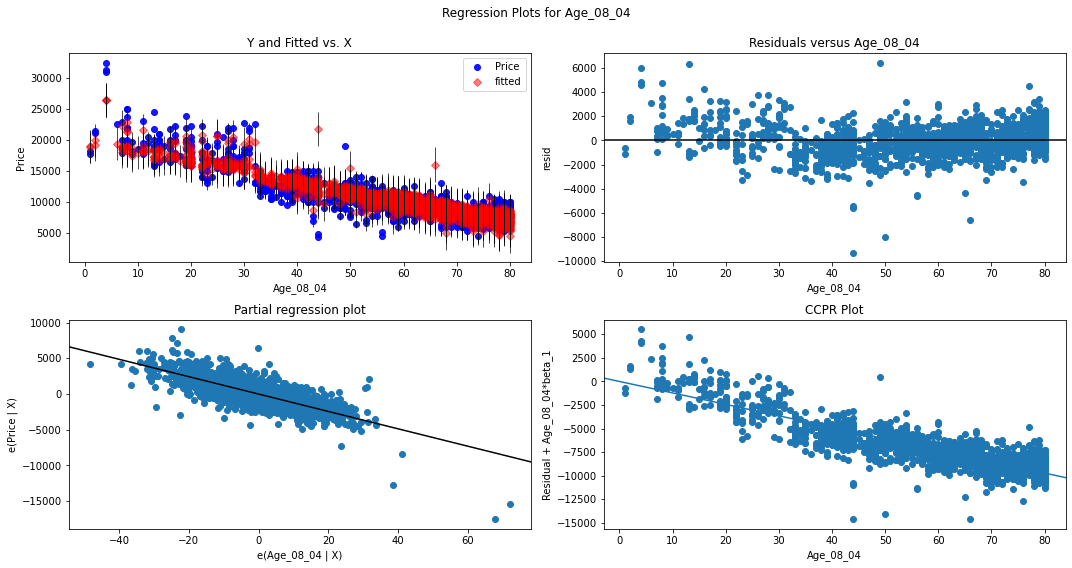

In [128]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


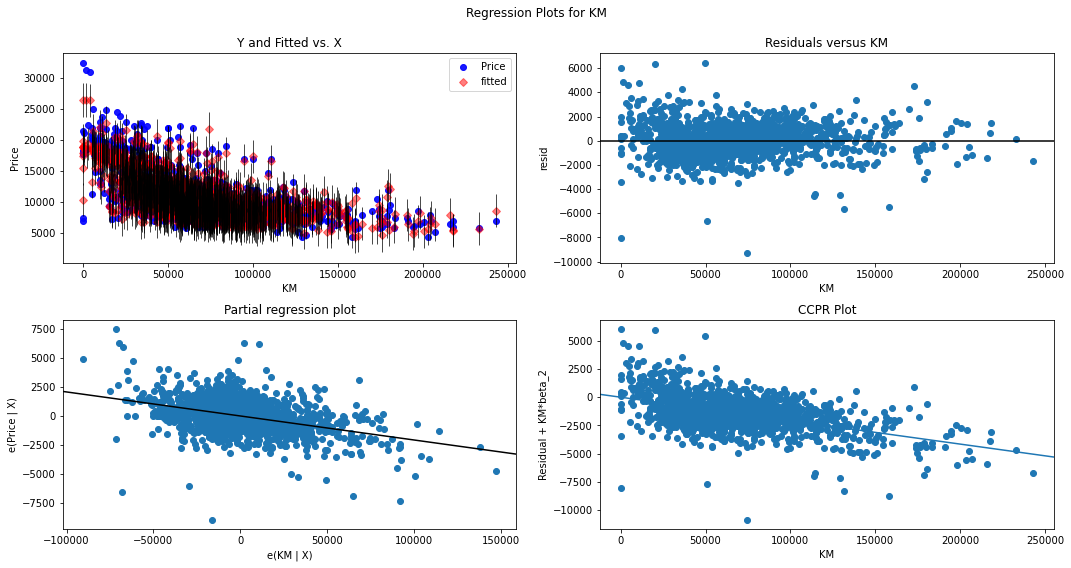

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


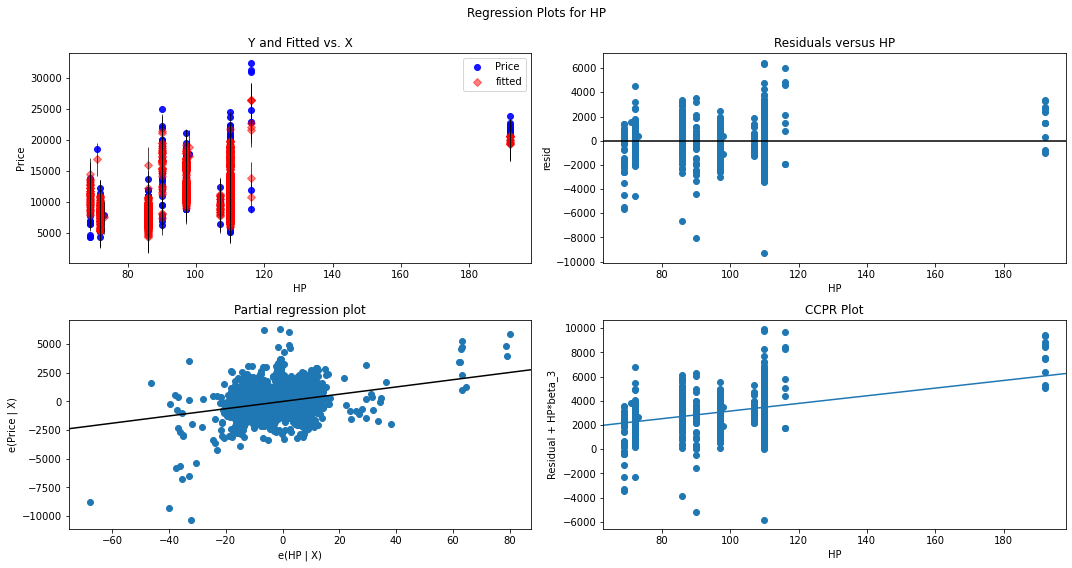

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


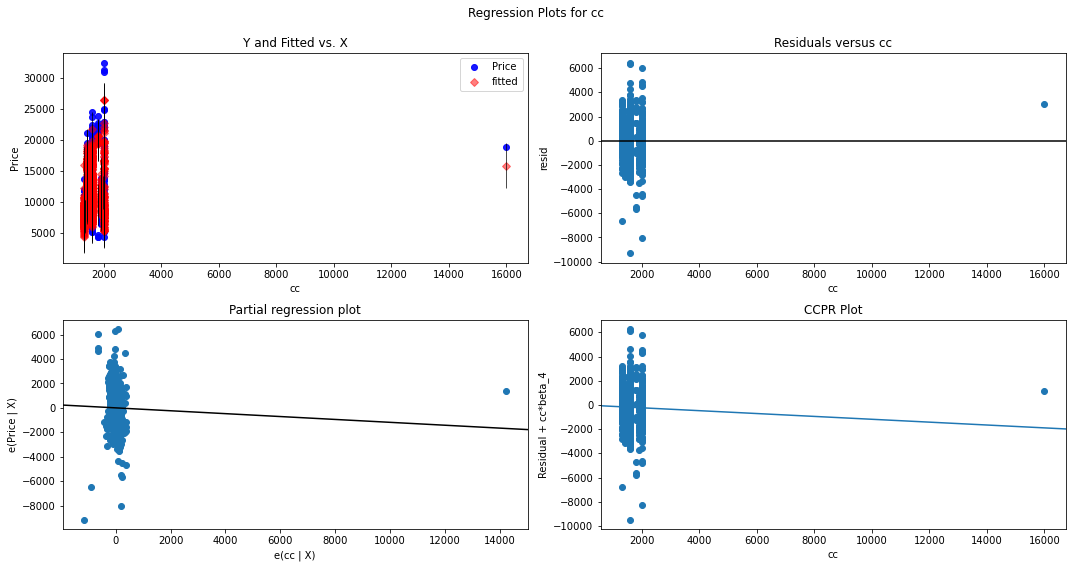

In [131]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


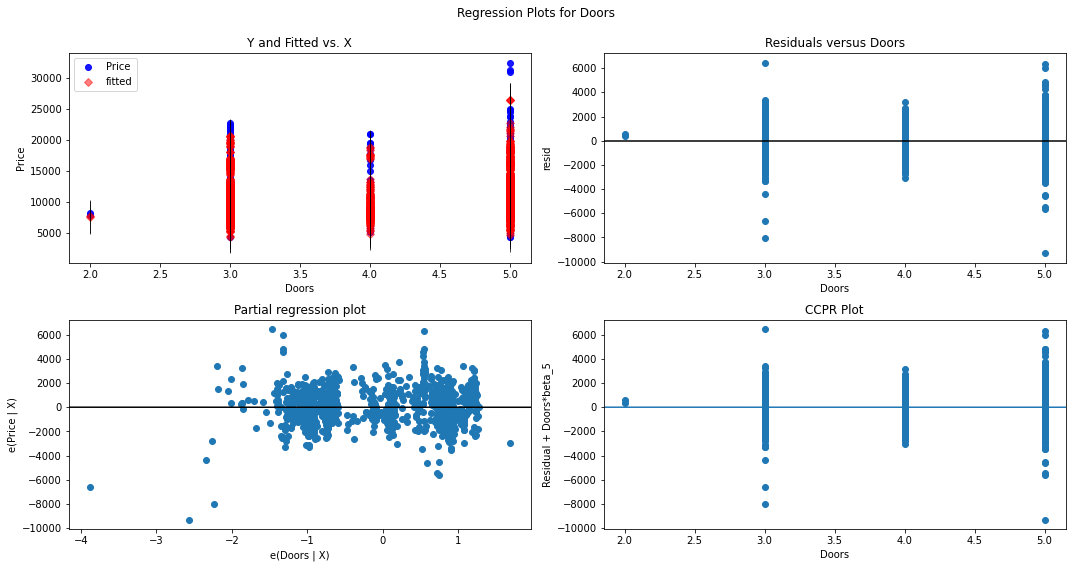

In [132]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


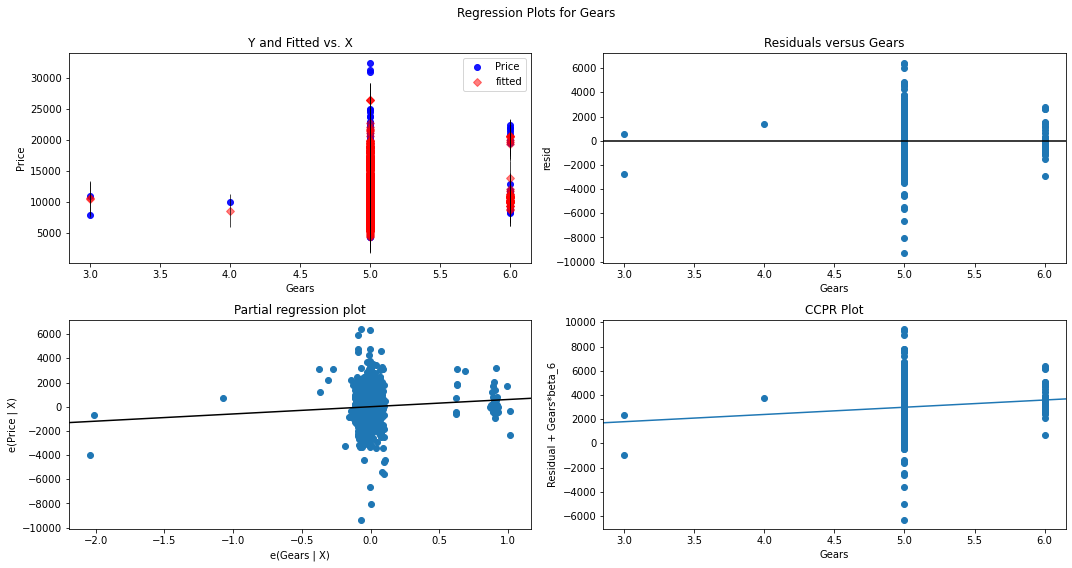

In [133]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


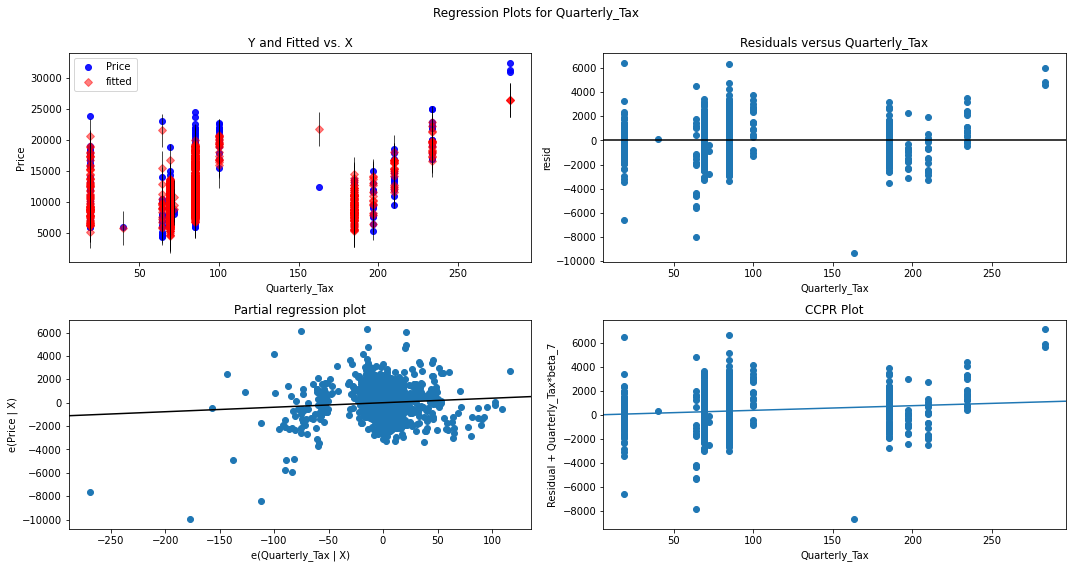

In [134]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


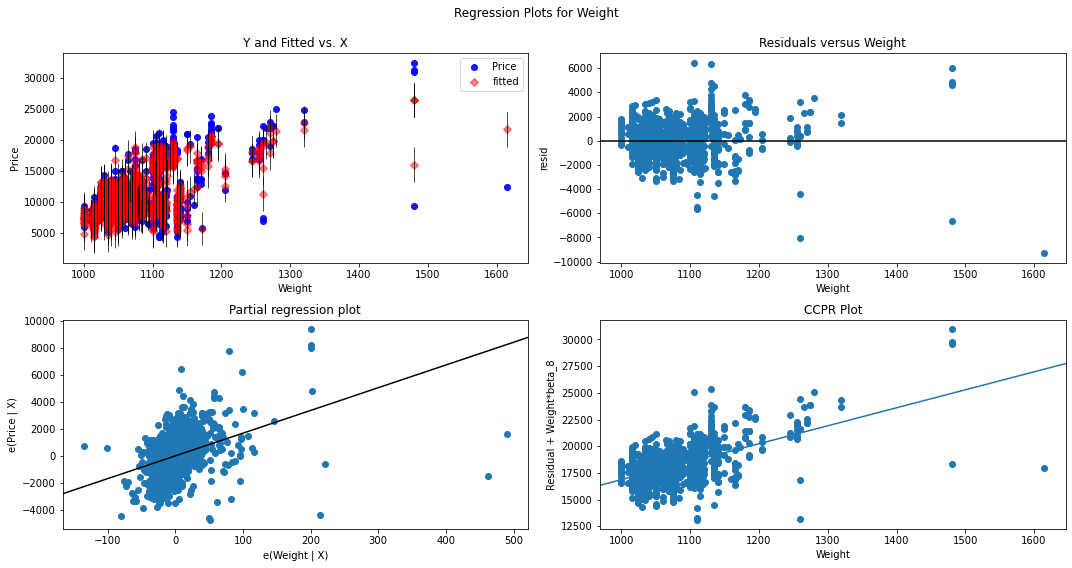

In [135]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Detecting Influencers/Outliers
## Cook's distance

In [136]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

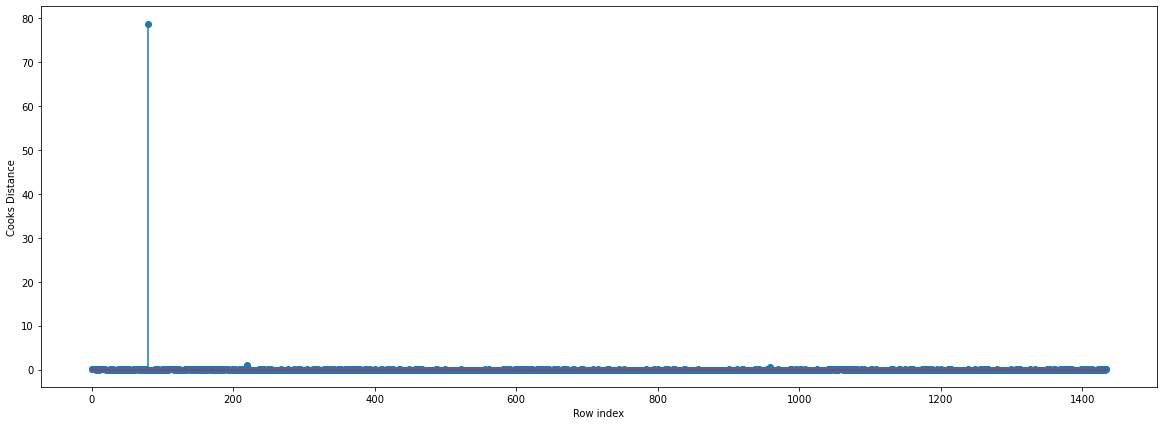

In [137]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [138]:
(np.argmax(c), np.max(c)) #np.argmax(c) gives the index no. and np.max() gives the value 

(80, 78.72950582271353)

# Leverage value

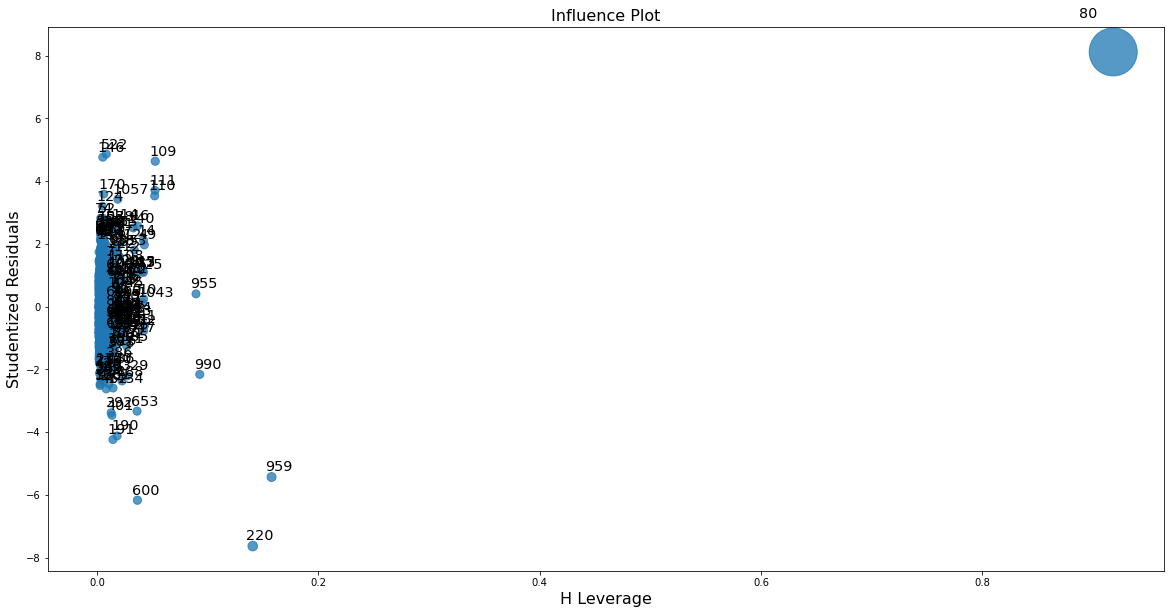

In [139]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(model,ax=ax)
plt.show()

In [140]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [141]:
#idex of influencer
data[data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving Model

In [142]:
imp_data=data.copy()
imp_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [143]:
#Discard the data points which are influencers and reasign the row number (reset_index())
new_data=imp_data.drop(imp_data.index[80],axis=0).reset_index(drop=True)
new_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [144]:
#dropping all influencers which are present in our new data
while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=new_data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new_data=new_data.drop(new_data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new_data      
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=new_data).fit()
    print('r-square :', final_model.rsquared ,'\n' , 'AIC     :',final_model.aic)
    print('Model Accuracy is improved to :',final_model.rsquared)

r-square : 0.8882395145171204 
 AIC     : 24382.707627340686
Model Accuracy is improved to : 0.8882395145171204


# Model R Squared value is : 88.82%

In [145]:
#our final imporoved data
new_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Model Prediction

In [146]:
actual=new_data['Price']

In [147]:
pred_values= final_model.fittedvalues
pred_values

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

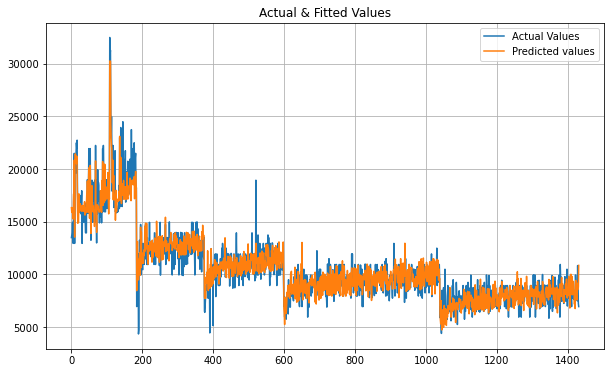

In [148]:
#plot for actual and fitted  values
plt.figure(figsize=(10,6))
plt.plot(actual,label='Actual Values')
plt.plot(pred_values,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

In [152]:
#prediction for new data
new_input=pd.DataFrame({'Age_08_04': 60, 'KM':60256, 'HP':115.23, 'cc':1566, 'Doors':4.2, 'Gears':5.2, 'Quarterly_Tax':90, 
                       'Weight':1100}, index=[1])


In [155]:
#now, predict car price based on new inputs
print("Car price is: ", final_model.predict(new_input))

Car price is:  1    11883.663501
dtype: float64
